## About


Even though the word bias does not have only one meaning, the title of the paper might be a bit misleading in some sense. Paper (together with dataset and recommended applications) offers sort of general testing and evaluating framework for arbitrary text to get some gender statistics from. 

&ensp; It focuses on three dimensions of gender signal in text: ABOUT, TO, AS and on assigning them with one of the 4 gender categories : masculine, feminine, neutral and unknown. Hence using such dataset to build a classifier will only allow us to build a classifier of which gender is present in a sentence. That still might be very a useful thing. 

&ensp; As authors propose, such classifier can be combined with an offensive/hate speech classifier and the results can be correlated to get some more interesting information. Another recommended usage of the dataset (and models trained on it) is controlling weights on automatically generated text. Since learned word embeddings are biased due to the nature of the data on the internet, automatically generated text might be skewed to one or another direction.

&ensp; We should further discuss how we want to approach the problem and what specific phenomena we want to detect. As this all is sort of sociologic question I propose to define our goal in a more rigid manner.

#### authors main idea:


Classifier of bias should perform almost random on ideal unbiased text. So classifier built on this dataset works as an benchmark of how biased text is in some sense.

#### Bias Detection

"Creating classifiers along different dimensions can
be used to detect gender bias in any form of text,
beyond dialogue itself. We investigate using the
trained classifiers to detect the most gendered sentences and paragraphs in various documents, and
analyze what portions of the text drive the classification decision. Such methods could be very
useful in practical applications such as detecting,
removing, and rewriting biased writing."

## Data


We have 7 automatically annotated large scale datasets:

* **ABOUT**
    * funpedia 
    * wizard 
    * image_chat
    *  yelp_inferred
    * convai2_inferred
    * light_inferred
    * opensubtitles_inferred


One crowdsourced evaluation benchmark of utterance-level gender **rewrites**.
* **ABOUT + AS + TO**
    * new_data

A list of gendered names, and a list of gendered words in English.
    
* gendered_words
* name_genders
    

In [93]:
from datasets import load_dataset
funpedia = load_dataset("md_gender_bias", "funpedia")
wizard = load_dataset("md_gender_bias", "wizard")
image_chat = load_dataset("md_gender_bias","image_chat")
yelp = load_dataset("md_gender_bias","yelp_inferred")
convai = load_dataset("md_gender_bias","convai2_inferred")
open_subtitles = load_dataset("md_gender_bias","opensubtitles_inferred")
light = load_dataset("md_gender_bias","light_inferred")
new_data = load_dataset("md_gender_bias","new_data")

Reusing dataset md_gender_bias (/home/horyctom/.cache/huggingface/datasets/md_gender_bias/funpedia/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224)
Reusing dataset md_gender_bias (/home/horyctom/.cache/huggingface/datasets/md_gender_bias/wizard/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224)
Reusing dataset md_gender_bias (/home/horyctom/.cache/huggingface/datasets/md_gender_bias/image_chat/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224)
Reusing dataset md_gender_bias (/home/horyctom/.cache/huggingface/datasets/md_gender_bias/yelp_inferred/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224)
Reusing dataset md_gender_bias (/home/horyctom/.cache/huggingface/datasets/md_gender_bias/convai2_inferred/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224)
Reusing dataset md_gender_bias (/home/horyctom/.cache/huggingface/datasets/md_gender_bias/opensubtitles_inferred/1.0.0/01dacda3d3a36

In [94]:
def get_gender_ratio(column_name,train_set):
    gender_rat = []
    for i in range (0,3):
        gender_rat.append(train_set.filter(lambda example: example[column_name] == i).num_rows)
    gender_rat = list(map(lambda x: x/len(train_set),gender_rat))
    return gender_rat

In [97]:
def plot_gender_ratio():
    funpedia_ratio = get_gender_ratio('gender',funpedia['train'])
    wizard_ratio = get_gender_ratio('gender',wizard['train'])
    convai_ratio = [0.4748246321459548,0.2731021470198877,0.25207322083415756]
    open_subtitles_ratio = [0.4023234084253467,0.192071468453378,0.40560512312127533]
    light_ratio = [0.6329413316748648,0.15436007613878366,0.21269859218635156]
    x = ['funpedia','wizard','convai','open_subtitles','light']

    neutral = np.array([funpedia_ratio[0], wizard_ratio[0], convai_ratio[0],
                        open_subtitles_ratio[0],light_ratio[0]])
    female = np.array([funpedia_ratio[1], wizard_ratio[1], convai_ratio[1],
                       open_subtitles_ratio[1],light_ratio[1]])
    male = np.array([funpedia_ratio[2], wizard_ratio[2],convai_ratio[2],
                     open_subtitles_ratio[2],light_ratio[2]])



    plt.figure(figsize=(14,5))

    # plot bars in stack manner
    plt.bar(x, neutral, color='g')
    plt.bar(x, female, bottom=neutral, color='r')
    plt.bar(x, male, bottom=neutral+female, color='b')


    plt.xlabel("Datasets")

    plt.ylabel("Ratio")
    plt.legend(["Neutral", "Female", "Male"])
    plt.title("Neutral-Female-Male ration in training data")

    plt.show()

In [96]:
def plot_sizes():
    datasets = (yelp,open_subtitles,convai,light,funpedia,wizard,image_chat)
    size = lambda x : x['train'].num_rows
    x_axis = ['yelp','open_subtitles','convai','light','funpedia','wizard','image_chat']
    y_axis = list(map(size,datasets))

    plt.figure(figsize=(14,5))
    plt.bar(x_axis, y_axis,log=True)
    plt.ylabel("Size of training datasets")
    plt.show()

## New data

In [ ]:
new_data

In [ ]:
new_data['train'].features

In [ ]:
new_data['train'][0]

## 1. Funpedia

In [80]:
funpedia

DatasetDict({
    train: Dataset({
        features: ['text', 'title', 'persona', 'gender'],
        num_rows: 23897
    })
    validation: Dataset({
        features: ['text', 'title', 'persona', 'gender'],
        num_rows: 2984
    })
    test: Dataset({
        features: ['text', 'title', 'persona', 'gender'],
        num_rows: 2938
    })
})

In [81]:
funpedia['train'].features

{'text': Value(dtype='string', id=None),
 'title': Value(dtype='string', id=None),
 'persona': Value(dtype='string', id=None),
 'gender': ClassLabel(num_classes=3, names=['gender-neutral', 'female', 'male'], names_file=None, id=None)}

In [82]:
funpedia['train'][0]

{'text': 'Max Landis is a comic book writer who wrote Chronicle, American Ultra, and Victor Frankestein.',
 'title': 'Max Landis',
 'persona': 'Humorous',
 'gender': 2}

In [89]:
funpedia_ratio = get_gender_ratio('gender',funpedia['train'])
funpedia_ratio

Loading cached processed dataset at /home/horyctom/.cache/huggingface/datasets/md_gender_bias/funpedia/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224/cache-6433ba41b5da61c9.arrow
Loading cached processed dataset at /home/horyctom/.cache/huggingface/datasets/md_gender_bias/funpedia/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224/cache-4221182d75e6b17f.arrow
Loading cached processed dataset at /home/horyctom/.cache/huggingface/datasets/md_gender_bias/funpedia/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224/cache-18837e74cba815d1.arrow


[0.04799765660961627, 0.15039544712725447, 0.8016068962631293]

## 2. Wizard

Text containting discussion of two people.

In [ ]:
wizard

In [ ]:
wizard['train'].features

In [ ]:
wizard['train'][0]

In [ ]:
wizard_ratio = get_gender_ratio('gender',wizard['train'])
wizard_ratio

## 3. ImageChat

Conversation discussing content of an image. And annotation is about person IN the image

In [ ]:
image_chat

In [ ]:
image_chat['train'].features

In [ ]:
image_chat['train'][0]

## 4. Yelp


In [ ]:
yelp

In [ ]:
yelp['train'].features

In [ ]:
yelp['train'][2]

## 5. ConvAI2

In [ ]:
convai

In [ ]:
convai['train'].features

In [ ]:
convai['train'][9]

In [ ]:
convai_ratio = get_gender_ratio('ternary_label',convai['train'])
print(convai_ratio)
convai_ratio = [0.4748246321459548,0.2731021470198877,0.25207322083415756] # just changing order by hand

## 6. OpenSubtitles

In [ ]:
open_subtitles

In [ ]:
open_subtitles['train'].features

In [ ]:
open_subtitles['train'][1]

In [ ]:
open_subtitles_ratio = get_gender_ratio('ternary_label',open_subtitles['train'])
print(open_subtitles_ratio)
open_subtitles_ratio = [0.4023234084253467,0.192071468453378,0.40560512312127533]

## 7. Light

In [ ]:
light

In [ ]:
light['train'].features

In [ ]:
light['train'][22]

In [ ]:
light_ratio = get_gender_ratio('ternary_label',light['train'])
print(light_ratio)
light_ratio = [0.6329413316748648,0.15436007613878366,0.21269859218635156]

## Datasets statistics

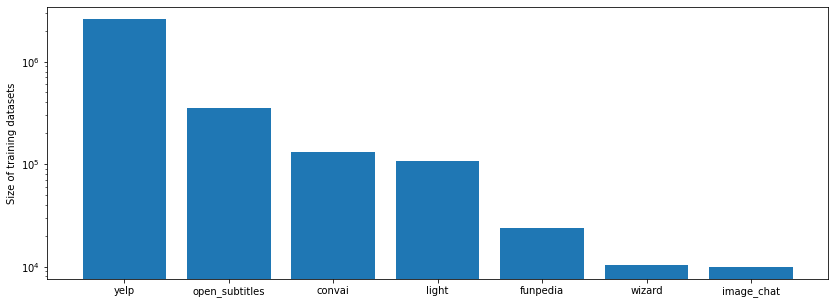

In [98]:
plot_sizes()

Here i exlcluded two datasets, which only have binary classification. They can be plotted in different plot.

Loading cached processed dataset at /home/horyctom/.cache/huggingface/datasets/md_gender_bias/funpedia/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224/cache-6433ba41b5da61c9.arrow
Loading cached processed dataset at /home/horyctom/.cache/huggingface/datasets/md_gender_bias/funpedia/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224/cache-4221182d75e6b17f.arrow
Loading cached processed dataset at /home/horyctom/.cache/huggingface/datasets/md_gender_bias/funpedia/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224/cache-18837e74cba815d1.arrow
Loading cached processed dataset at /home/horyctom/.cache/huggingface/datasets/md_gender_bias/wizard/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224/cache-045d4dabe769b435.arrow
Loading cached processed dataset at /home/horyctom/.cache/huggingface/datasets/md_gender_bias/wizard/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224/cache-91418eebf5b3

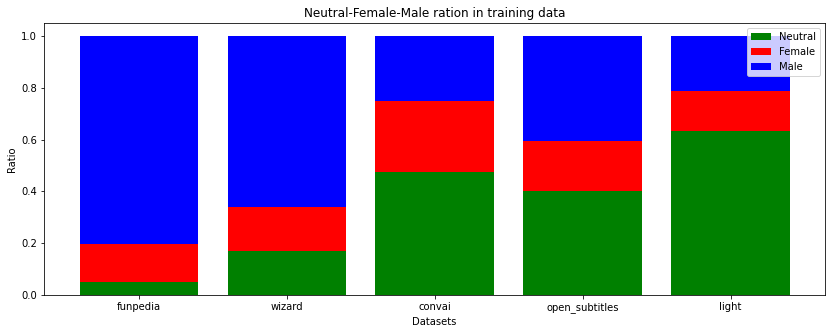

In [100]:
plot_gender_ratio()

## Finetuning BERT for ABOUT axis classification

## Funpedia data


### setup

In [101]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader

from datasets import load_metric
from datasets import load_dataset

from transformers import AutoTokenizer, DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification
from transformers import AdamW
from transformers import get_scheduler
from transformers import TrainingArguments
from transformers import Trainer

import itertools
import numpy as np
import matplotlib.pyplot as plt
import nltk

from sklearn.metrics import confusion_matrix
from tqdm.auto import tqdm

import gc
import wandb

checkpoint = 'bert-base-cased'
checkpoint = 'distilbert-base-uncased'

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [102]:
def tokenize_function(data):
    return tokenizer(data['text'], truncation=True)

In [103]:
def clean_memory():
    gc.collect()
    torch.cuda.empty_cache()

In [104]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [105]:
def compute_metrics(test_dataloader):
    metric = load_metric("f1")

    model.eval()
    for batch in test_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        metric.add_batch(predictions=predictions, references=batch["labels"])
        
    return metric.compute(average='micro')

In [106]:
raw_datasets = load_dataset("md_gender_bias", "funpedia")
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint,num_labels=3)

Reusing dataset md_gender_bias (/home/horyctom/.cache/huggingface/datasets/md_gender_bias/funpedia/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224)
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceC

In [107]:
model.to(device)
device

device(type='cuda')

In [108]:
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Loading cached processed dataset at /home/horyctom/.cache/huggingface/datasets/md_gender_bias/funpedia/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224/cache-722d38457396b218.arrow
Loading cached processed dataset at /home/horyctom/.cache/huggingface/datasets/md_gender_bias/funpedia/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224/cache-0476aa87bd5b6f06.arrow


  0%|          | 0/3 [00:00<?, ?ba/s]

## data preprocessing

In [109]:
tokenized_datasets = tokenized_datasets.remove_columns(['text', 'title','persona'])
tokenized_datasets = tokenized_datasets.rename_column('gender', 'labels')
tokenized_datasets.set_format("torch")

tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['attention_mask', 'labels', 'input_ids'],
        num_rows: 23897
    })
    validation: Dataset({
        features: ['attention_mask', 'labels', 'input_ids'],
        num_rows: 2984
    })
    test: Dataset({
        features: ['attention_mask', 'labels', 'input_ids'],
        num_rows: 2938
    })
})

## DataLoaders

In [110]:
train_dataloader = DataLoader(
    tokenized_datasets["train"], shuffle=True, batch_size=32, collate_fn=data_collator)
eval_dataloader = DataLoader(
    tokenized_datasets["validation"], batch_size=32, collate_fn=data_collator)
test_dataloader = DataLoader(
    tokenized_datasets["test"], batch_size=32, collate_fn=data_collator)
test_onebatch_dataloader = DataLoader(
    tokenized_datasets["test"], batch_size=2938, collate_fn=data_collator)

In [111]:
#sanity check
for batch in train_dataloader:
    break
{k: v.shape for k, v in batch.items()}

{'attention_mask': torch.Size([32, 37]),
 'labels': torch.Size([32]),
 'input_ids': torch.Size([32, 37])}

In [112]:
#sanity check
outputs = model(**batch.to(device))
print(outputs.loss, outputs.logits.shape)

tensor(1.1426, device='cuda:0', grad_fn=<NllLossBackward>) torch.Size([32, 3])


In [113]:
train_dataloader.dataset['labels'] 

tensor([2, 2, 2,  ..., 2, 1, 2])

### Training

## training via Trainer API + wandb

In [ ]:
wandb.login()

In [ ]:
%env WANDB_PROJECT=training_mdgender

In [ ]:
training_args = TrainingArguments("test-trainer")

In [ ]:
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

## clasic torch loop

In [ ]:
optimizer = AdamW(model.parameters(), lr=1e-5)

num_epochs = 10
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

num_training_steps

In [ ]:
progress_bar = tqdm(range(num_training_steps))

In [ ]:
model.train()
count = 0

for epoch in range(num_epochs):
    
    for batch in train_dataloader:
        
        batch = {k: v.to(device) for k, v in batch.items()}
        
        optimizer.zero_grad()
        
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        
        optimizer.step()  
        lr_scheduler.step()
        
        count+=1
        if count % 300 == 0:
            print("Loss: " + str(loss.item()))
            
        progress_bar.update(1)

## Save & load

In [ ]:
torch.save(model.state_dict(),'../trained_models/funpedia_mdgender.pth')

In [114]:
model.load_state_dict(torch.load('../trained_models/funpedia_mdgender.pth'))
model.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

## Evaluate

A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).

In [115]:
metric = load_metric("f1")

model.eval()
for batch in test_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
    
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])
    
metric.compute(average='micro')

{'f1': 0.8893805309734514}

In [116]:
batch = next(iter(test_onebatch_dataloader))

model.eval()
with torch.no_grad():
    batch.to(device)
    output = model(**batch)

labels = torch.tensor(raw_datasets['test']['gender'])
preds = F.softmax(output.logits,dim=1).argmax(dim=1)

Confusion matrix, without normalization
[[  33    7   89]
 [   6  330   92]
 [  56   75 2250]]


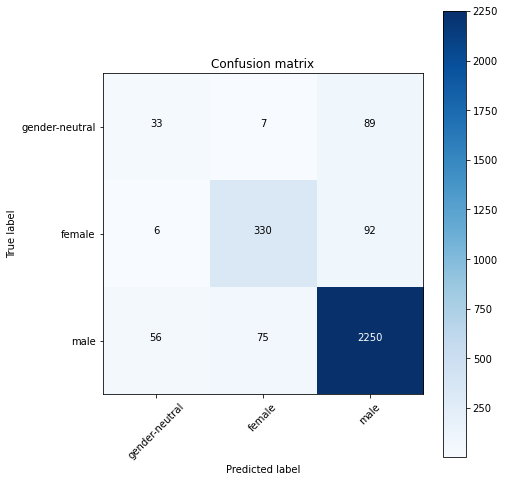

In [118]:
cm = confusion_matrix(labels,preds.cpu())

plt.figure(figsize=(7,7))
plot_confusion_matrix(cm,raw_datasets['test'].features['gender'].names)

Here we can see that due to the proportions of dataset, majority of 'gender-neutral' data were classified as male

### Application outside of the dataset

In [119]:
fp = open("../data/michelle_obama.txt")
data = fp.read()

tokenizer_text = nltk.data.load('tokenizers/punkt/english.pickle')

inputs = tokenizer_text.tokenize(data)

inputs = tokenizer(inputs, padding=True, truncation=True, return_tensors="pt")

model.eval()
with torch.no_grad():
    inputs.to(device)
    output = model(**inputs)
    
classification = F.softmax(output.logits,dim=1).argmax(dim=1)
classification

tensor([1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')

In [120]:
print("Mean:", torch.mean(classification.to(torch.float)).item())
print("Median:", torch.median(classification).item())

Mean: 1.0892857313156128
Median: 1


classifier succesfully regognized Text about Michelle Obama as about 'female'

## Eval on golden new_data set

In [37]:
new_data['train'].features

{'text': Value(dtype='string', id=None),
 'original': Value(dtype='string', id=None),
 'labels': [ClassLabel(num_classes=6, names=['ABOUT:female', 'ABOUT:male', 'PARTNER:female', 'PARTNER:male', 'SELF:female', 'SELF:male'], names_file=None, id=None)],
 'class_type': ClassLabel(num_classes=3, names=['about', 'partner', 'self'], names_file=None, id=None),
 'turker_gender': ClassLabel(num_classes=5, names=['man', 'woman', 'nonbinary', 'prefer not to say', 'no answer'], names_file=None, id=None),
 'episode_done': Value(dtype='bool_', id=None),
 'confidence': Value(dtype='string', id=None)}

In [46]:
filtered_raw = new_data.filter(lambda item: item['labels'] == [0] or item['labels'] == [1])
filtered_raw

Loading cached processed dataset at /home/horyctom/.cache/huggingface/datasets/md_gender_bias/new_data/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224/cache-801a3080b04ca8f5.arrow


DatasetDict({
    train: Dataset({
        features: ['text', 'original', 'labels', 'class_type', 'turker_gender', 'episode_done', 'confidence'],
        num_rows: 785
    })
})

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint,num_labels=3)
model.load_state_dict(torch.load('../trained_models/funpedia_mdgender.pth'))
model.eval()

In [41]:
model.to(device)
device

device(type='cuda')

In [49]:
def unpack_labels(example):
    example['labels'] = example['labels'][0]
    return example

updated_dataset = filtered_raw.map(unpack_labels)


  0%|          | 0/785 [00:00<?, ?ex/s]

In [54]:
updated_dataset['train'][1]

{'text': 'She participated in the FIVB volleyball grand champions cup in 2001.',
 'original': 'She participated in the FIVB volleyball grand champions cup in 2001',
 'labels': 0,
 'class_type': 0,
 'turker_gender': 4,
 'episode_done': True,
 'confidence': 'certain'}

In [58]:
tokenized = updated_dataset.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [59]:
tokenized

DatasetDict({
    train: Dataset({
        features: ['attention_mask', 'class_type', 'confidence', 'episode_done', 'input_ids', 'labels', 'original', 'text', 'turker_gender'],
        num_rows: 785
    })
})

In [ ]:
tokenized = tokenized.remove_columns(['text', 'confidence','class_type',
                                      'episode_done','original','turker_gender'])
tokenized.set_format("torch")
tokenized

In [69]:
eval_dataloader = DataLoader(
    tokenized['train'], shuffle=True, batch_size=32, collate_fn=data_collator)

In [73]:
#sanity check
for batch in train_dataloader:
    break
{k: v.shape for k, v in batch.items()}

{'attention_mask': torch.Size([32, 28]),
 'input_ids': torch.Size([32, 28]),
 'labels': torch.Size([32])}

In [79]:
with torch.no_grad():
    preds = model(**batch.to(device))
F.softmax(preds.logits,dim=1)

tensor([[7.2644e-04, 5.9929e-03, 9.9328e-01],
        [4.8943e-04, 1.9257e-03, 9.9758e-01],
        [2.7154e-04, 4.2214e-04, 9.9931e-01],
        [2.0312e-02, 7.8901e-01, 1.9067e-01],
        [4.6586e-04, 3.8651e-04, 9.9915e-01],
        [5.4264e-03, 3.6279e-03, 9.9095e-01],
        [2.1830e-04, 3.0790e-04, 9.9947e-01],
        [5.3720e-03, 9.9947e-03, 9.8463e-01],
        [2.6160e-03, 1.8148e-03, 9.9557e-01],
        [2.4204e-04, 5.3592e-04, 9.9922e-01],
        [2.3839e-04, 6.7115e-04, 9.9909e-01],
        [1.5171e-03, 1.4784e-04, 9.9834e-01],
        [2.1411e-04, 1.3731e-04, 9.9965e-01],
        [6.7813e-03, 6.7579e-01, 3.1743e-01],
        [2.5727e-04, 2.7496e-04, 9.9947e-01],
        [1.3825e-03, 1.7600e-02, 9.8102e-01],
        [2.9451e-04, 2.1174e-04, 9.9949e-01],
        [4.7318e-03, 9.6324e-01, 3.2031e-02],
        [3.9549e-03, 3.7057e-01, 6.2548e-01],
        [6.8749e-03, 8.9651e-01, 9.6615e-02],
        [3.1012e-03, 9.8642e-01, 1.0480e-02],
        [3.6256e-03, 6.6611e-01, 3

In [63]:
#sanity check
outputs = model(**batch.to(device))
print(outputs.loss, outputs.logits.shape)

tensor(6.2679, device='cuda:0', grad_fn=<NllLossBackward>) torch.Size([32, 3])
